In [55]:
import mne
import os.path as op
import numpy as np
from __future__ import print_function
from matplotlib import pyplot as plt
%matplotlib inline

# `Raw`: continuous data

Continuous data is stored in objects of type `Raw`. The core data structure is simply a 2D numpy array (channels × samples, `._data`) combined with an `Info` object (`.info`)(**LINK TO INFO TUTORIAL**).

The most common way to load continuous data is from a .fif file. For more information on loading data from other formats, see (**LINK TO IO TUTORIAL**), or creating it from raw data, see (**LINK TO CREATION TUTORIAL**).

## Loading data

In [96]:
# Load an example dataset, the preload flag loads the data into memory now
data_path = op.join(mne.datasets.sample.data_path(), 'MEG',
                    'sample', 'sample_audvis_raw.fif')
raw = mne.io.RawFIF(data_path, preload=True)

# Give the size of the data matrix
print('channels x samples:', raw._data.shape)

Opening raw data file /Users/choldgraf/github/mne-python/examples/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
Current compensation grade : 0
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Adding average EEG reference projection.
1 projection items deactivated
Reading 0 ... 166799  =      0.000 ...   277.714 secs...
[done]
channels x samples: (376, 166800)


Information about the channels contained in the `Raw` object is contained in the `info` attribute. This is essentially a dictionary with a number of relevant fields (**SEE INFO TUTORIAL FOR FULL DESCRIPTION**)

In [38]:
# We will pull the sampling frequency for fast reference
print(raw.info)
sfreq = raw.info['sfreq']

<Info | 25 non-empty fields
    acq_pars : unicode | 13886 items
    bads : list | MEG 2443, EEG 053
    buffer_size_sec : numpy.float64 | 0.998976065792
    ch_names : list | MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, ...
    chs : list | 376 items (EOG: 1, EEG: 60, STIM: 9, GRAD: 204, MAG: 102)
    comps : list | 0 items
    custom_ref_applied : bool | False
    description : unicode | 49 items
    dev_head_t : dict | 3 items
    dig : list | 146 items
    events : list | 1 items
    experimenter : unicode | 3 items
    file_id : dict | 4 items
    filename : unicode | /Users/cho.../sample_audvis_raw.fif
    highpass : float | 0.10000000149
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    lowpass : float | 172.176300049
    meas_date : numpy.ndarray | 2002-12-03 20:01:10
    meas_id : dict | 4 items
    nchan : int | 376
    proj_id : numpy.ndarray | 1 items
    proj_name : unicode | 4 items
    projs : list | PCA-v1: off, PCA-v2: off, PCA-v3: off, ...
    sf

## Indexing data
There are two ways to access the data stored within `Raw` objects. One is by accessing the underlying data array, and the other is to index the `Raw` object directly.

To access the data array of `Raw` objects, use the `_data` attribute. Note that this is only present if `preload==True`.

Shape of data array: (203, 166800)


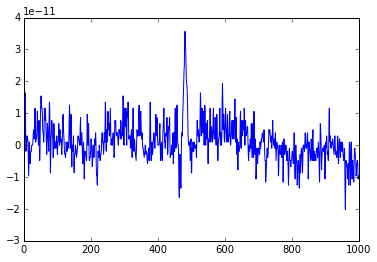

In [91]:
print('Shape of data array:', raw._data.shape)
array_data = raw._data[0, :1000]
_ = plt.plot(array_data)

You can also pass an index directly to the `Raw` object. This will return an array of times, as well as the data representing those timepoints. This may be used even if the data is not preloaded:

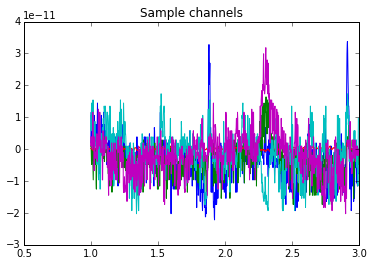

In [97]:
# Extract data from the first 5 channels, from 1 s to 3 s.
data, times = raw[:5, sfreq * 1:sfreq * 3]
_ = plt.plot(times, data.T)
_ = plt.title('Sample channels')

## Intelligent indexing
It is possible to use more intelligent indexing to extract data. This is based on channel name or channel type.

In [106]:
# Pull all MEG gradiometer channels:
# Make sure to use copy==True or it will overwrite the data
meg_only = raw.pick_types(meg=True, copy=True)
eeg_only = raw.pick_types(meg=False, eeg=True, copy=True)

# The MEG flag in particular lets you specify a string for more specificity
grad_only = raw.pick_types(meg='grad', copy=True)

# Or you can use custom channel names
pick_chans = ['MEG 0112', 'MEG 0111', 'MEG 0122', 'MEG 0123',]
specific_chans = raw.pick_channels(pick_chans, copy=True)
print(meg_only, eeg_only, grad_only, specific_chans, sep='\n')

<Raw  |  n_channels x n_times : 305 x 166800>
<Raw  |  n_channels x n_times : 59 x 166800>
<Raw  |  n_channels x n_times : 203 x 166800>
<Raw  |  n_channels x n_times : 4 x 166800>


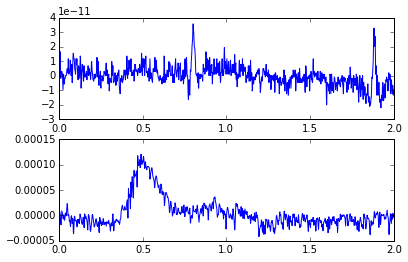

In [107]:
# Notice the different scalings of these types
f, (a1, a2) = plt.subplots(2, 1)
eeg, times = eeg_only[0, :sfreq*2]
meg, times = meg_only[0, :sfreq*2]
a1.plot(times, meg[0])
a2.plot(times, eeg[0])